In [ ]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02b_filtering_and_resampling/Tour_Eiffel.jpg'.split())

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Activation, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import GaussianNoise
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
train=ImageDataGenerator(rescale=1./255)
validation=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!unzip dermnet_Dataset.zip

Archive:  dermnet_Dataset.zip
   creating: dermnet_Dataset/test_dataset/
   creating: dermnet_Dataset/test_dataset/acne/
  inflating: dermnet_Dataset/test_dataset/acne/141__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/142__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/149__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/160__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/165__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/169__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInkiLDg1XQ.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/171__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg  
  inflating: dermnet_Dataset/test_dataset/acne/173__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInki

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_dataset=train_datagen.flow_from_directory( 'dermnet_Dataset/train_dataset', 
        target_size=(150, 150), 
        batch_size=20,
        class_mode='categorical')  
train_dataset.class_indices

Found 568 images belonging to 4 classes.


{'acne': 0, 'eczema': 1, 'psoriasis': 2, 'rosacea': 3}

In [ ]:
validation=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)
test_dataset=test.flow_from_directory('dermnet_Dataset/test_dataset', 
        target_size=(150, 150), 
        batch_size=20,
        class_mode='categorical')  
validation_dataset=validation.flow_from_directory(
       'dermnet_Dataset/validation_dataset',
        target_size=(150, 150),
        batch_size=20)

X_train,y_train=train_dataset.next()
X_test,y_test=validation_dataset.next()


Found 174 images belonging to 4 classes.
Found 157 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(48, (5, 5), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  
model.add(Dense(112))
model.add(Activation('relu'))
model.add(Dense(112))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))
import keras
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=10,
                   epochs=500,
                   validation_data=validation_dataset)

Epoch 1/500


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 48)        38448     
_________________________________________________________________
activation_1 (Activation)    (None, 70, 70, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        2

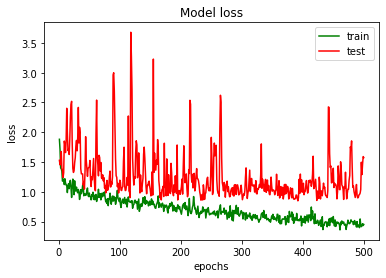

In [ ]:
import matplotlib.pyplot as plt
loss=model_fit.history['loss']
val_loss=model_fit.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'g')
plt.plot(epochs,val_loss,'r')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper right')
plt.show()

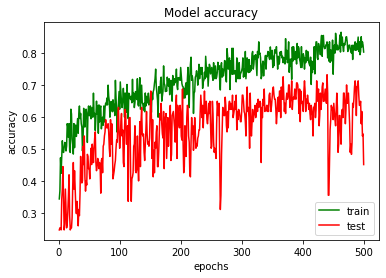

In [ ]:
acc=model_fit.history['accuracy']
val_acc=model_fit.history['val_accuracy']
plt.plot(epochs,acc,'g')
plt.plot(epochs,val_acc,'r')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='lower right')
plt.show()

(20, 150, 150, 3)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
print(cm)

[[6 2 0 1]
 [0 3 2 0]
 [0 2 3 0]
 [1 0 0 0]]


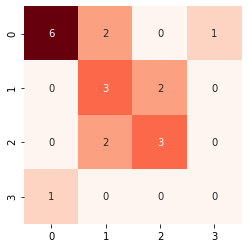

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=plt.cm.Reds)

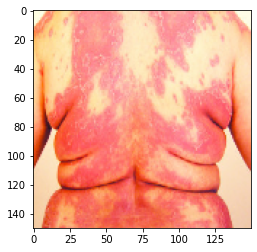

In [ ]:
img = image.load_img("skin_image/test_data/psoriasis/_0_9.jpg", target_size=(150,150,3))
plt.imshow(img)




In [ ]:
input=image.img_to_array(img)
input=np.expand_dims(input, axis=0)
predict=model.predict(input)
print(predict)

[[0. 1. 0.]]


In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.43      0.60      0.50         5
           2       0.60      0.60      0.60         5
           3       0.00      0.00      0.00         1

    accuracy                           0.60        20
   macro avg       0.47      0.47      0.46        20
weighted avg       0.64      0.60      0.61        20

